In [3]:
import pandas as pd

### 날짜 어쩌구 저쩌구 되어 있는 거

In [3]:

data  = pd.read_csv('./20230904_010835_387_23.csv')

In [4]:
data.describe()

,x,y,z
count,1.048500e+06,1.048500e+06,1.048500e+06
mean,-7.832413e-03,-6.803755e-03,-6.556041e-03
std,1.000074e-02,8.883059e-03,2.535368e-01
min,-1.202393e-01,-1.074219e-01,-5.068970e-01
25%,-9.765625e-03,-8.544922e-03,-2.218628e-01
50%,-7.934570e-03,-6.713867e-03,-2.807617e-02
75%,-5.798340e-03,-4.882812e-03,2.389526e-01
max,1.235962e-01,1.400757e-01,4.739380e-01


In [5]:
data[data['Time']==data.iloc[0,0]]

,Time,x,y,z
0,2023.09.04 01:46:59.763,-0.008850,-0.000610,0.300598
1,2023.09.04 01:46:59.763,-0.024719,-0.009460,0.308838
2,2023.09.04 01:46:59.763,-0.003357,-0.010986,0.311584
3,2023.09.04 01:46:59.763,0.027466,-0.006104,0.324402
4,2023.09.04 01:46:59.763,-0.008240,-0.003662,0.335693
...,...,...,...,...
95,2023.09.04 01:46:59.763,-0.002747,-0.010376,-0.303955
96,2023.09.04 01:46:59.763,-0.008240,-0.007935,-0.278931
97,2023.09.04 01:46:59.763,-0.013733,-0.006104,-0.279541
98,2023.09.04 01:46:59.763,-0.009155,-0.015869,-0.277710


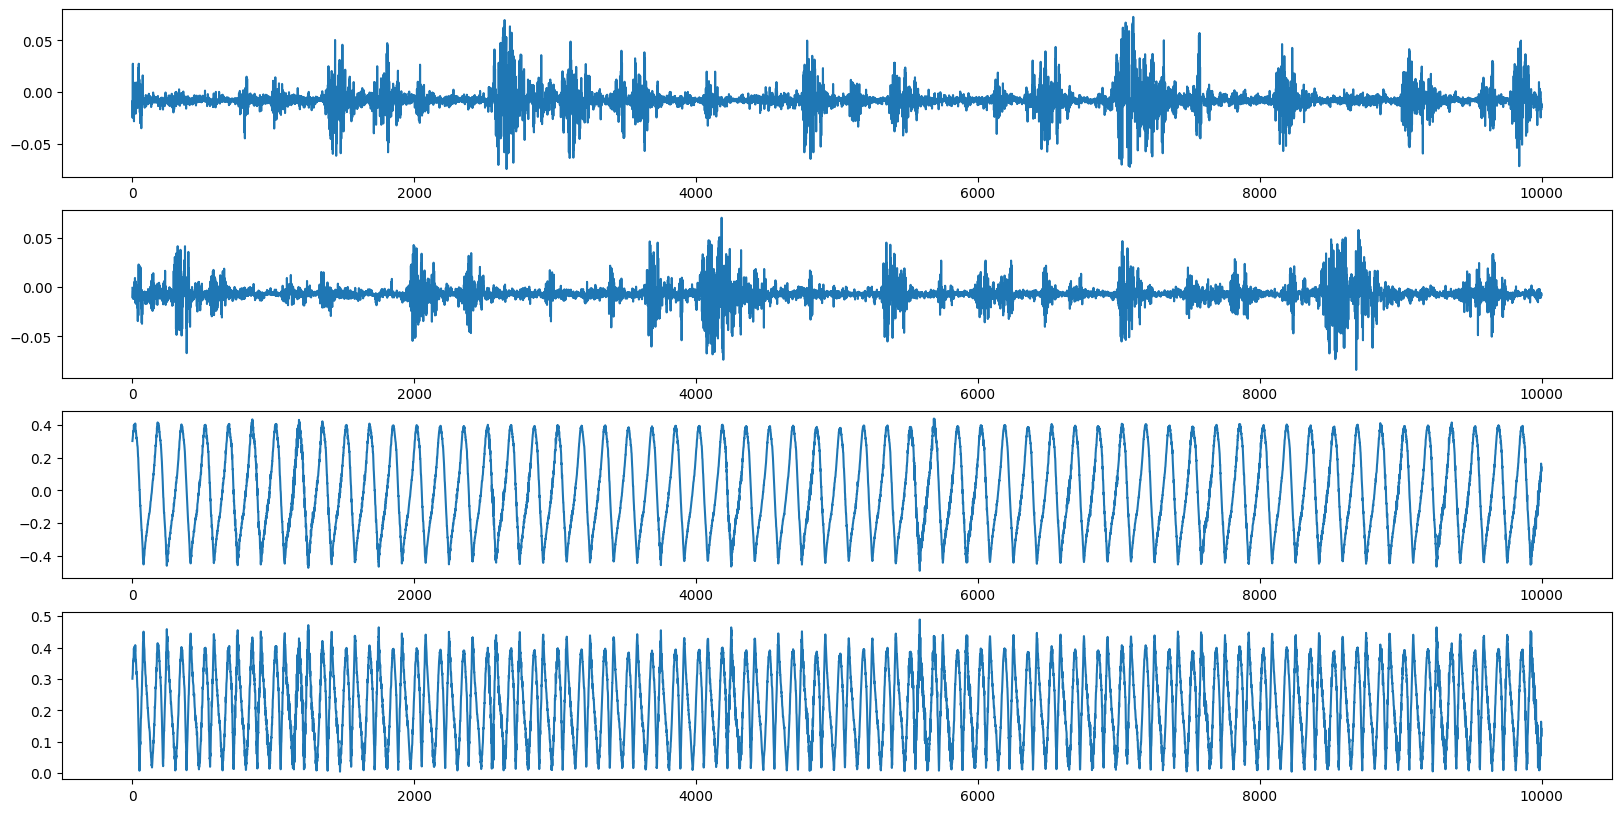

In [6]:
import matplotlib.pyplot as plt
import numpy as np
Data = data.drop('Time',axis=1)
n= 0
m = 10000
plt.figure(figsize=(20,10))
ax1= plt.subplot(4,1,1)
ax1.plot(Data['x'].iloc[n:m]);
ax2= plt.subplot(4,1,2)
ax2.plot(Data['y'].iloc[n:m]);
ax3= plt.subplot(4,1,3)
ax3.plot(Data['z'].iloc[n:m]);
ax4 = plt.subplot(4,1,4)
ax4.plot(np.sqrt(Data.apply(lambda row: row['x']**2 + row['y']**2+row['z']**2, axis=1)).iloc[n:m]);

### FC5_CNCData

In [4]:
data_fc5 = pd.read_csv('./FC5_CNCData.csv', low_memory=False)

In [5]:
data_fc5.columns

Index(['result', 'table', '_start', '_stop', '_time', '_value', '_field',
       '_measurement'],
      dtype='object')

In [6]:
len(data_fc5['result'].unique())

1

In [7]:
for column in data_fc5.columns:
    print(f'{column}에 있는 value_counts unique 개수: {len(data_fc5[column].unique())}, 필요한가?: {"NO" if len(data_fc5[column].unique())==1 else "YES"}')
print(data_fc5.shape)

result에 있는 value_counts unique 개수: 1, 필요한가?: NO
table에 있는 value_counts unique 개수: 17, 필요한가?: YES
_start에 있는 value_counts unique 개수: 1, 필요한가?: NO
_stop에 있는 value_counts unique 개수: 1, 필요한가?: NO
_time에 있는 value_counts unique 개수: 51718, 필요한가?: YES
_value에 있는 value_counts unique 개수: 91307, 필요한가?: YES
_field에 있는 value_counts unique 개수: 17, 필요한가?: YES
_measurement에 있는 value_counts unique 개수: 1, 필요한가?: NO
(879206, 8)


result, _start, _stop, _measurement는 new data에 넣을 필요 없음: csv 고유값

또한 51718*17=879206이다.

_time,_value는 데이터에 넣자.

In [8]:
redata=data_fc5[['table','_time','_value','_field','_measurement']]

In [24]:
#데이터 split
def pivoting(data:pd.DataFrame,name:str,value:str):
    columns = list(data[name].unique())
    new_data = pd.Series()
    for column in columns:
        column_data = data[data[name]==column][value]
        column_data = column_data.reset_index(drop=True)
        new_data=pd.concat([new_data,column_data],axis=1,ignore_index=True) 
    new_data = new_data.iloc[:,1:]
    new_data.columns= columns
    new_data.index = list(data['_time'].unique())
    return new_data

In [25]:
data_fc5['_time'].unique()

array(['2023-09-03 18:47:15.438000+00:00',
       '2023-09-03 18:47:20.440000+00:00',
       '2023-09-03 18:47:25.438000+00:00', ...,
       '2023-09-06 18:46:57.516000+00:00',
       '2023-09-06 18:47:02.515000+00:00',
       '2023-09-06 18:47:07.520000+00:00'], dtype=object)

In [26]:
data_fc5[data_fc5['_time']==data_fc5['_time'][0]]

,result,table,_start,_stop,_time,_value,_field,_measurement
0,_result,0,2023-09-03 18:47:12.039386+00:00,2023-09-06 18:47:12.039386+00:00,2023-09-03 18:47:15.438000+00:00,0.0,Linear_X_Load,FC5_CNCData
51718,_result,1,2023-09-03 18:47:12.039386+00:00,2023-09-06 18:47:12.039386+00:00,2023-09-03 18:47:15.438000+00:00,-0.009,Linear_X_Pos,FC5_CNCData
103436,_result,2,2023-09-03 18:47:12.039386+00:00,2023-09-06 18:47:12.039386+00:00,2023-09-03 18:47:15.438000+00:00,0.0,Linear_Y_Load,FC5_CNCData
155154,_result,3,2023-09-03 18:47:12.039386+00:00,2023-09-06 18:47:12.039386+00:00,2023-09-03 18:47:15.438000+00:00,0.0,Linear_Y_Pos,FC5_CNCData
206872,_result,4,2023-09-03 18:47:12.039386+00:00,2023-09-06 18:47:12.039386+00:00,2023-09-03 18:47:15.438000+00:00,0.0,Linear_Z_Load,FC5_CNCData
258590,_result,5,2023-09-03 18:47:12.039386+00:00,2023-09-06 18:47:12.039386+00:00,2023-09-03 18:47:15.438000+00:00,-0.017,Linear_Z_Pos,FC5_CNCData
310308,_result,6,2023-09-03 18:47:12.039386+00:00,2023-09-06 18:47:12.039386+00:00,2023-09-03 18:47:15.438000+00:00,0.0,RotaryC_Load,FC5_CNCData
362026,_result,7,2023-09-03 18:47:12.039386+00:00,2023-09-06 18:47:12.039386+00:00,2023-09-03 18:47:15.438000+00:00,0.0,RotaryC_Vel,FC5_CNCData
413744,_result,8,2023-09-03 18:47:12.039386+00:00,2023-09-06 18:47:12.039386+00:00,2023-09-03 18:47:15.438000+00:00,X Z,active_axes,FC5_CNCData
465462,_result,9,2023-09-03 18:47:12.039386+00:00,2023-09-06 18:47:12.039386+00:00,2023-09-03 18:47:15.438000+00:00,M99,block,FC5_CNCData


In [28]:
new_data = pivoting(data_fc5,'_field','_value')
new_data=new_data.astype({'Linear_X_Load':'float64', 
'Linear_X_Pos':'float64',
'Linear_Y_Load': 'float64',
'Linear_Y_Pos' : 'float64',
'Linear_Z_Load': 'float64',
'Linear_Z_Pos'  : 'float64',
'RotaryC_Load': 'float64',
'RotaryC_Vel' : 'float64',
'active_axes'  : 'object',
'block':   'object',         
'execution' :   'object',
'path_feedrate'  :   'float64',
'path_position_X'  :   'float64',
'path_position_Y'   :  'float64',
'path_position_Z'   :  'float64',
'timestamp' :         'object',
'tool_id' :           'float64',})

In [29]:
for column in new_data.columns:
    print(f'{column}에 있는 unique 개순: {len(new_data[column].unique())}')
print(new_data.shape)

Linear_X_Load에 있는 unique 개순: 104
Linear_X_Pos에 있는 unique 개순: 15336
Linear_Y_Load에 있는 unique 개순: 1
Linear_Y_Pos에 있는 unique 개순: 1
Linear_Z_Load에 있는 unique 개순: 113
Linear_Z_Pos에 있는 unique 개순: 5752
RotaryC_Load에 있는 unique 개순: 111
RotaryC_Vel에 있는 unique 개순: 860
active_axes에 있는 unique 개순: 1
block에 있는 unique 개순: 56
execution에 있는 unique 개순: 3
path_feedrate에 있는 unique 개순: 676
path_position_X에 있는 unique 개순: 13691
path_position_Y에 있는 unique 개순: 1
path_position_Z에 있는 unique 개순: 4242
timestamp에 있는 unique 개순: 51718
tool_id에 있는 unique 개순: 6
(51718, 17)


Y축 관련 데이터는 모두 삭제 

In [30]:
new_data.drop(columns=['Linear_Y_Load','Linear_Y_Pos','active_axes','path_position_Y'],inplace=True)

In [31]:
print(new_data['execution'].unique())
print(new_data['tool_id'].unique())

['STOPPED' 'ACTIVE' 'INTERRUPTED']
[300. 101. 202. 303. 100. 200.]


In [32]:
new_data['execution'].value_counts()

execution
ACTIVE         48884
STOPPED         2832
INTERRUPTED        2
Name: count, dtype: int64

In [33]:
new_data

,Linear_X_Load,Linear_X_Pos,Linear_Z_Load,Linear_Z_Pos,RotaryC_Load,RotaryC_Vel,block,execution,path_feedrate,path_position_X,path_position_Z,timestamp,tool_id
2023-09-03 18:47:15.438000+00:00,0.0,-0.009,0.0,-0.017,0.0,0.0,M99,STOPPED,0.0,-0.009,-0.017,3:47:15:435,300.0
2023-09-03 18:47:20.440000+00:00,0.0,-0.009,0.0,-0.017,0.0,0.0,M99,STOPPED,0.0,-0.009,-0.017,3:47:20:438,300.0
2023-09-03 18:47:25.438000+00:00,0.0,-0.009,0.0,-0.017,0.0,0.0,M99,STOPPED,0.0,-0.009,-0.017,3:47:25:436,300.0
2023-09-03 18:47:30.440000+00:00,0.0,-0.009,0.0,-0.017,0.0,0.0,M99,STOPPED,0.0,-0.009,-0.017,3:47:30:438,300.0
2023-09-03 18:47:35.444000+00:00,0.0,-0.009,0.0,-0.017,0.0,0.0,M99,STOPPED,0.0,-0.009,-0.017,3:47:35:441,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-06 18:46:47.512000+00:00,22.0,0.000,3.0,0.000,0.0,0.0,M81,ACTIVE,0.0,0.000,0.000,3:46:47:510,300.0
2023-09-06 18:46:52.515000+00:00,22.0,0.000,3.0,0.000,0.0,0.0,M81,ACTIVE,0.0,0.000,0.000,3:46:52:513,300.0
2023-09-06 18:46:57.516000+00:00,22.0,0.000,3.0,0.000,0.0,0.0,M81,ACTIVE,0.0,0.000,0.000,3:46:57:513,300.0
2023-09-06 18:47:02.515000+00:00,22.0,0.000,3.0,0.000,0.0,0.0,M81,ACTIVE,0.0,0.000,0.000,3:47:2:513,300.0


In [34]:
new_data.dtypes

Linear_X_Load      float64
Linear_X_Pos       float64
Linear_Z_Load      float64
Linear_Z_Pos       float64
RotaryC_Load       float64
RotaryC_Vel        float64
block               object
execution           object
path_feedrate      float64
path_position_X    float64
path_position_Z    float64
timestamp           object
tool_id            float64
dtype: object

In [35]:
new_data.describe()

,Linear_X_Load,Linear_X_Pos,Linear_Z_Load,Linear_Z_Pos,RotaryC_Load,RotaryC_Vel,path_feedrate,path_position_X,path_position_Z,tool_id
count,51718.000000,51718.000000,51718.000000,51718.000000,51718.000000,51718.000000,51718.000000,51718.000000,51718.000000,51718.000000
mean,18.171024,-157.802422,4.161859,-86.973970,5.054971,483.761708,748.941742,39.851107,2.216130,254.034475
std,8.375397,198.672750,10.480086,84.837205,10.922093,484.961861,3306.996665,104.106905,19.824999,72.001829
min,0.000000,-622.830000,0.000000,-200.400000,0.000000,0.000000,0.000000,-145.000000,-20.000000,100.000000
25%,13.000000,-255.600000,2.000000,-180.600000,0.000000,0.000000,0.000000,0.000000,0.000000,202.000000
50%,22.000000,-40.757000,3.000000,-136.778000,1.000000,586.000000,126.000000,0.000000,0.000000,300.000000
75%,23.000000,0.000000,4.000000,0.000000,7.000000,1042.750000,231.000000,90.077250,1.170000,300.000000
max,124.000000,0.000000,141.000000,0.000000,111.000000,1106.000000,23431.000000,621.840000,183.400000,303.000000


In [36]:
n= 2500
m = 4500
plt.figure(figsize=(20,10))
ax1= plt.subplot(6,1,1)
ax1.plot(new_data['Linear_X_Load'].iloc[n:m],color='red');
ax1.plot(new_data['Linear_Z_Load'].iloc[n:m],color='blue');
ax2= plt.subplot(6,1,2)
ax2.plot(new_data['Linear_X_Pos'].iloc[n:m],color='red');
ax2.plot(new_data['Linear_Z_Pos'].iloc[n:m],color='blue');
ax3= plt.subplot(6,1,3)
ax3.plot(new_data['RotaryC_Load'].iloc[n:m],color='red');
ax3.plot(new_data['RotaryC_Vel'].iloc[n:m],color='blue')
ax4= plt.subplot(6,1,4)
ax4.plot(new_data[['path_feedrate']].iloc[n:m]);
ax5=plt.subplot(6,1,5)
ax5.plot(new_data['path_position_X'].iloc[n:m],color='red');
ax5.plot(new_data['path_position_Z'].iloc[n:m],color='blue');

NameError: name 'plt' is not defined

#### 데이터 분리해보기


In [37]:
time = new_data[new_data['execution']=='INTERRUPTED'].index[-1]
new_data.iloc[time+1:time+11,:]

TypeError: can only concatenate str (not "int") to str

In [38]:
abnormal

NameError: name 'abnormal' is not defined

### FC_5HO_POWERDATA

In [39]:
from glob import glob
csvlist = glob("./FC_5HO_POWERDATA/*.csv")
FC_datalist = [pd.read_csv(path,low_memory=False,skiprows=range(3),\
               usecols=['result','table','_start','_stop','_time','_value','_field','_measurement']) for path in csvlist]

In [40]:
temp = FC_datalist[0]

In [41]:
for column in temp.columns:
    print(f'{column}에 있는 unique 개수: {len(temp[column].unique())}')
print(temp.shape)

result에 있는 unique 개수: 1
table에 있는 unique 개수: 22
_start에 있는 unique 개수: 1
_stop에 있는 unique 개수: 1
_time에 있는 unique 개수: 46869
_value에 있는 unique 개수: 3629
_field에 있는 unique 개수: 22
_measurement에 있는 unique 개수: 1
(1008237, 8)


In [42]:
newFC5_list = [pivoting(temp,'_field','_value')for temp in FC_datalist] # pivoting

In [45]:
newFC5_list[2]
    

,Active_Power_W1,Active_Power_W2,Active_Power_W3,Apparent_Power_Va1,Apparent_Power_Va2,Apparent_Power_Va3,Line_Current_L1,Line_Current_L2,Line_Current_L3,Line_Voltage_V12,Line_Voltage_V23,Line_Voltage_V31
2023-08-24T15:00:01Z,55.0,54.6,67.8,82.2,73.2,88.0,66.0,56.4,67.6,2221.0,2237.0,2229.6
2023-08-24T15:00:02Z,49.0,48.0,60.0,75.0,66.0,79.0,60.0,51.0,61.0,2224.0,2240.0,2232.0
2023-08-24T15:00:03Z,49.0,48.0,60.0,75.0,66.0,79.0,60.0,51.0,61.0,2224.0,2240.0,2232.0
2023-08-24T15:00:04Z,49.0,48.0,60.0,75.0,66.0,79.0,60.0,51.0,61.0,2224.0,2240.0,2232.0
2023-08-24T15:00:05Z,49.0,48.0,60.0,75.0,66.0,79.0,60.0,51.0,61.0,2224.0,2240.0,2232.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25T14:59:55Z,37.0,30.0,41.0,61.0,49.0,56.0,49.0,38.0,44.0,2203.0,2219.0,NaN
2023-08-25T14:59:56Z,37.0,30.0,41.0,61.0,49.0,56.0,49.0,38.0,44.0,2203.0,2219.0,NaN
2023-08-25T14:59:57Z,36.0,30.0,39.0,58.0,49.0,54.0,47.0,38.0,42.0,2206.0,2219.0,NaN
2023-08-25T14:59:58Z,36.0,30.0,39.0,58.0,49.0,54.0,47.0,38.0,42.0,2206.0,2219.0,NaN
